In [66]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [67]:
Train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
Train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [68]:
count = 0
dict1 = dict()
for x in Train_data['MSZoning'].unique():
    dict1[x]= count
    count+=1
print(dict1)

{'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4}


### Helper functions

In [69]:
def object_to_numeric(Dataframe,dict_list = None):
    columns = Dataframe.columns
    count_list_no,count_unique = 0,0
    if dict_list ==None:
        dict_list = []
        for column in tqdm(columns):
            dict_list.append(dict())
            if Dataframe[column].dtype=='object':
                # print(column)
                for x in Dataframe[column].unique():
                    dict_list[count_list_no][x] = count_unique
                    count_unique +=1
                count_unique = 0
            count_list_no +=1
    count = 0
    for column in tqdm(columns):
        if Dataframe[column].dtype=='object':
            Dataframe[column] = Dataframe[column].replace(to_replace=dict_list[count])
            Dataframe[column] = Dataframe[column].astype(float)
        count +=1
    return (Dataframe,dict_list)

def Check_null(Dataframe):
    columns = Dataframe.columns
    columns_containing_null = Dataframe.isnull().sum()
    for index,column in enumerate(columns_containing_null):
        if column>0:
            print(f"{columns[index]}---> {column} null values")

def Normalize(Dataframe):
    columns = Dataframe.columns
    for column in columns:
        if column != 'SalePrice':
            Dataframe[column] =  Dataframe[column]/np.max(Dataframe[column])
    return Dataframe

In [70]:
Train_data.drop_duplicates()  ##--> To remove any duplicate rows if present
Train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [71]:
# Id of the transaction is irrelavent to classification , therefore we can drop it
Train_data.drop('Id',axis=1,inplace=True)
Train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [72]:
Train_data['MSZoning'].unique(),Train_data['MSZoning'].value_counts()

(array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 MSZoning
 RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: count, dtype: int64)

In [73]:
# Converting object values to numeric which our model can understand
Train_data,dict_list = object_to_numeric(Train_data)
if 'object' in (Train_data.dtypes):
    print("Object type detected")

100%|██████████| 80/80 [00:00<00:00, 432.09it/s]


In [74]:
dict_list

[{},
 {'RL': 0, 'RM': 1, 'C (all)': 2, 'FV': 3, 'RH': 4},
 {},
 {},
 {'Pave': 0, 'Grvl': 1},
 {nan: 0, 'Grvl': 1, 'Pave': 2},
 {'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3},
 {'Lvl': 0, 'Bnk': 1, 'Low': 2, 'HLS': 3},
 {'AllPub': 0, 'NoSeWa': 1},
 {'Inside': 0, 'FR2': 1, 'Corner': 2, 'CulDSac': 3, 'FR3': 4},
 {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 {'CollgCr': 0,
  'Veenker': 1,
  'Crawfor': 2,
  'NoRidge': 3,
  'Mitchel': 4,
  'Somerst': 5,
  'NWAmes': 6,
  'OldTown': 7,
  'BrkSide': 8,
  'Sawyer': 9,
  'NridgHt': 10,
  'NAmes': 11,
  'SawyerW': 12,
  'IDOTRR': 13,
  'MeadowV': 14,
  'Edwards': 15,
  'Timber': 16,
  'Gilbert': 17,
  'StoneBr': 18,
  'ClearCr': 19,
  'NPkVill': 20,
  'Blmngtn': 21,
  'BrDale': 22,
  'SWISU': 23,
  'Blueste': 24},
 {'Norm': 0,
  'Feedr': 1,
  'PosN': 2,
  'Artery': 3,
  'RRAe': 4,
  'RRNn': 5,
  'RRAn': 6,
  'PosA': 7,
  'RRNe': 8},
 {'Norm': 0,
  'Artery': 1,
  'RRNn': 2,
  'Feedr': 3,
  'PosN': 4,
  'PosA': 5,
  'RRAn': 6,
  'RRAe': 7},
 {'1Fam': 0, '2fmCon': 1, '

In [75]:
Check_null(Train_data)

LotFrontage---> 259 null values
MasVnrArea---> 8 null values
GarageYrBlt---> 81 null values


In [76]:
##!--> I am going to replace the null values with 0 , the idea is if I do not have any value for a parameter I am not considering it while training or testing my model.
Train_data_before_filled_null = Train_data.copy()
Train_data = Train_data.fillna(0)

In [77]:
Train_data.to_csv("After_removing_null.csv")
Train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [78]:
Train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,2,2008,0.0,0.0,208500
1,20,0.0,80.0,9600,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,5,2007,0.0,0.0,181500
2,60,0.0,68.0,11250,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,9,2008,0.0,0.0,223500
3,70,0.0,60.0,9550,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0.0,0.0,0.0,0,2,2006,0.0,1.0,140000
4,60,0.0,84.0,14260,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,12,2008,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0.0,62.0,7917,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,8,2007,0.0,0.0,175000
1456,20,0.0,85.0,13175,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,0.0,0,2,2010,0.0,0.0,210000
1457,70,0.0,66.0,9042,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,3.0,1.0,2500,5,2010,0.0,0.0,266500
1458,20,0.0,68.0,9717,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,4,2010,0.0,0.0,142125


In [79]:
columns = Train_data.columns
columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

OK, we still have 3 columns containing null values , lets address this issue.

In [80]:
Check_null(Train_data)
## Now we are ready to train!!!, 1 last thing to do , lets normalize the data

Normalizing ie. making the value in each column varry from 0-1.

In [81]:
Train_data = Normalize(Train_data)
Train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.315789,0.0,0.207668,0.039258,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00000,0.166667,0.999005,0.0,0.0,208500
1,0.105263,0.0,0.255591,0.044600,0.0,0.0,0.000000,0.0,0.0,0.25,...,0.0,0.0,0.00,0.00,0.00000,0.416667,0.998507,0.0,0.0,181500
2,0.315789,0.0,0.217252,0.052266,0.0,0.0,0.333333,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00000,0.750000,0.999005,0.0,0.0,223500
3,0.368421,0.0,0.191693,0.044368,0.0,0.0,0.333333,0.0,0.0,0.50,...,0.0,0.0,0.00,0.00,0.00000,0.166667,0.998010,0.0,0.2,140000
4,0.315789,0.0,0.268371,0.066250,0.0,0.0,0.333333,0.0,0.0,0.25,...,0.0,0.0,0.00,0.00,0.00000,1.000000,0.999005,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.315789,0.0,0.198083,0.036781,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00000,0.666667,0.998507,0.0,0.0,175000
1456,0.105263,0.0,0.271565,0.061209,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.25,0.00,0.00000,0.166667,1.000000,0.0,0.0,210000
1457,0.368421,0.0,0.210863,0.042008,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.75,0.25,0.16129,0.416667,1.000000,0.0,0.0,266500
1458,0.105263,0.0,0.217252,0.045144,0.0,0.0,0.000000,0.0,0.0,0.00,...,0.0,0.0,0.00,0.00,0.00000,0.333333,1.000000,0.0,0.0,142125


Now formating the test data the same way


In [82]:
Test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
Test_data.drop_duplicates()  ##--> To remove any duplicate rows if present
Test_data.drop('Id',axis=1,inplace=True)
Test_data,test_dict_list = object_to_numeric(Test_data)
Check_null(Test_data)
Normalize(Test_data)
Test_data

100%|██████████| 79/79 [00:00<00:00, 435.67it/s]


LotFrontage---> 227 null values
MasVnrArea---> 15 null values
BsmtFinSF1---> 1 null values
BsmtFinSF2---> 1 null values
BsmtUnfSF---> 1 null values
TotalBsmtSF---> 1 null values
BsmtFullBath---> 2 null values
BsmtHalfBath---> 2 null values
GarageYrBlt---> 78 null values
GarageCars---> 1 null values
GarageArea---> 1 null values


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.105263,0.0,0.400,0.205336,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.208333,0.0,0.0,0.00,0.000000,0.000000,0.500000,1.00000,0.0,0.0
1,0.105263,0.2,0.405,0.252067,0.0,0.0,0.333333,0.000000,0.0,0.25,...,0.000000,0.0,0.0,0.25,0.333333,0.735294,0.500000,1.00000,0.0,0.0
2,0.315789,0.2,0.370,0.244346,0.0,0.0,0.333333,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.250000,1.00000,0.0,0.0
3,0.315789,0.2,0.390,0.176290,0.0,0.0,0.333333,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.25,0.000000,0.000000,0.500000,1.00000,0.0,0.0
4,0.631579,0.2,0.215,0.088428,0.0,0.0,0.333333,0.333333,0.0,0.00,...,0.250000,0.0,0.0,0.25,0.000000,0.000000,0.083333,1.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.842105,0.4,0.105,0.034205,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.25,0.000000,0.000000,0.500000,0.99801,0.0,0.0
1455,0.842105,0.4,0.105,0.033463,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.25,0.000000,0.000000,0.333333,0.99801,0.0,0.4
1456,0.105263,0.2,0.800,0.353357,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.25,0.000000,0.000000,0.750000,0.99801,0.0,0.4
1457,0.447368,0.2,0.310,0.184470,0.0,0.0,0.000000,0.000000,0.0,0.00,...,0.000000,0.0,0.0,0.00,0.666667,0.041176,0.583333,0.99801,0.0,0.0


##### Dividing into X_train and y_train

In [83]:
X_values = np.array(Train_data.drop('SalePrice',axis=1))
y_values = np.array(Train_data['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,test_size=0.2,random_state=42)
X_train.shape

(1168, 79)

In [84]:
#Clustering:-
#Of prices with encoded value of each parameter
from sklearn.cluster import KMeans


In [85]:
cluster = []
for x in range(len(X_values)):
    cluster.append([X_values[x].sum(),y_values[x]])

In [86]:
cluster = np.array(cluster)

In [87]:
K_cluster = KMeans(n_clusters=3,verbose=0)



/home/aarush/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


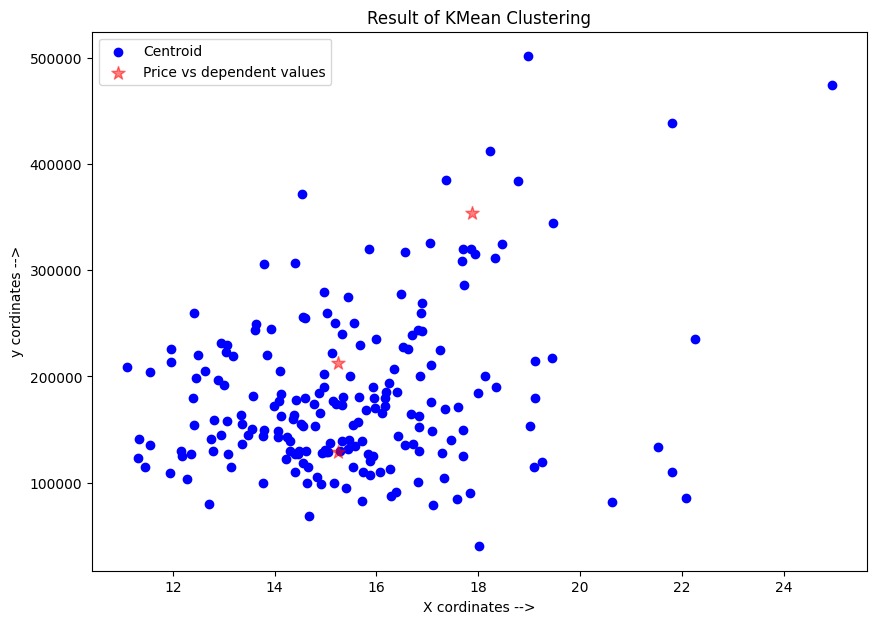

In [88]:
K_cluster.fit(cluster[:200])
Cluster_centers = K_cluster.cluster_centers_
# K_cluster.get_params()
plt.figure(figsize=(10,7))
# plt.scatter()
plt.scatter(cluster[:200,0],cluster[:200,1],c='b')
plt.scatter(Cluster_centers[:,0],Cluster_centers[:,1],marker='*',s = 100,c='r',alpha=0.5)
plt.xlabel("X cordinates -->")
plt.ylabel("y cordinates -->")
plt.legend({'Centroid','Price vs dependent values'})
plt.title('Result of KMean Clustering')
plt.show()  ##! ---> We can see no clusters , therefore our data is not biased.

In [89]:
n_neighbors = range(1,80)
mean_absolute_error_value = []
for n in tqdm(n_neighbors):
    knn_regressor = KNeighborsRegressor(n,metric='manhattan')
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mean_absolute_error_value.append(mean_absolute_error(y_test,y_pred))

100%|██████████| 79/79 [00:08<00:00,  9.74it/s]


In [90]:
y_test[:5],y_pred[:5]

(array([154500, 325000, 115000, 159000, 315500]),
 array([133769.30379747, 260777.88607595, 126266.4556962 , 150535.12658228,
        297242.82278481]))

([<matplotlib.lines.Line2D at 0x7f82fbf412a0>], 23179.781506849315, 4)

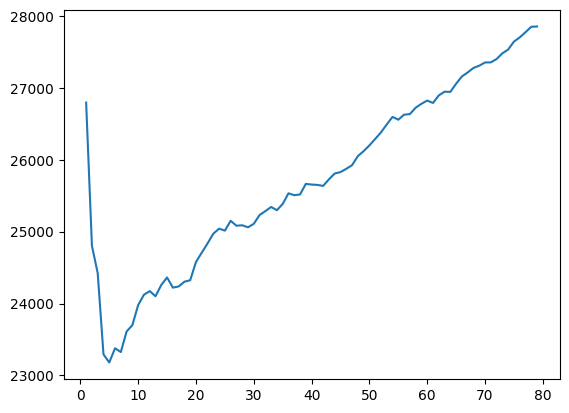

In [91]:
plt.plot(n_neighbors,mean_absolute_error_value),np.min(mean_absolute_error_value),np.argmin(mean_absolute_error_value)

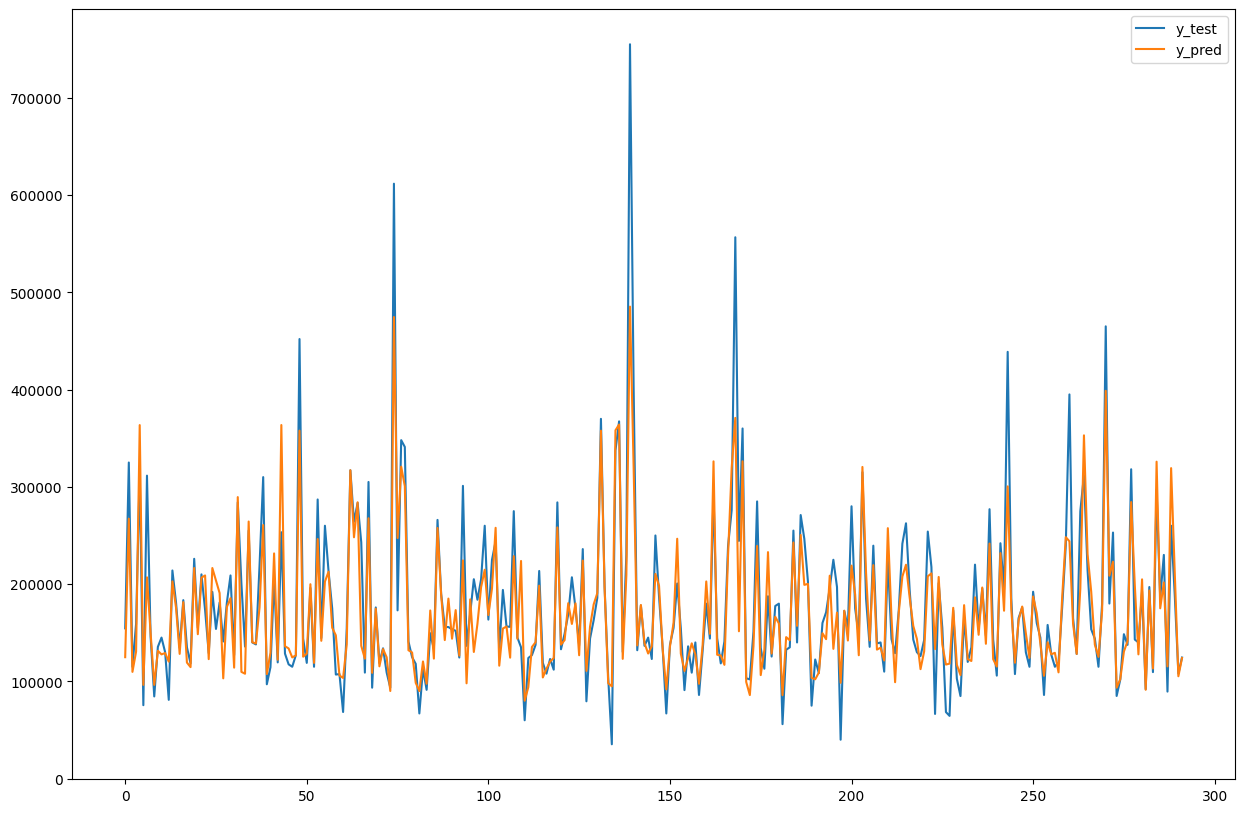

In [92]:
knn_regressor = KNeighborsRegressor(4,metric='manhattan')
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mean_absolute_error_optimized = (mean_absolute_error(y_test,y_pred))
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_test)),y_pred)
plt.legend({'y_pred','y_test'})

In [93]:
knn_regressor = KNeighborsRegressor(4)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mean_absolute_error_value.append(mean_absolute_error(y_test,y_pred))

Replacing the N/A values by mean

In [94]:
'''
LotFrontage---> 259 null values
MasVnrArea---> 8 null values
GarageYrBlt---> 81 null values
'''
Train_data_mean = Train_data_before_filled_null.copy()
Train_data_mean,dict_list_mean = object_to_numeric(Train_data_mean,dict_list)
Check_null(Train_data_mean)
Train_data_mean['LotFrontage'].fillna(Train_data_mean['LotFrontage'].mean(), inplace=True)
Train_data_mean['MasVnrArea'].fillna(Train_data_mean['MasVnrArea'].mean(), inplace=True)
Train_data_mean['GarageYrBlt'].fillna(Train_data_mean['GarageYrBlt'].mean(), inplace=True)
columns = Train_data_mean.columns
for column in columns:
    if column != 'SalePrice':
        Train_data_mean[column] =  Train_data_mean[column]
Train_data_mean

100%|██████████| 80/80 [00:00<00:00, 11605.31it/s]

LotFrontage---> 259 null values
MasVnrArea---> 8 null values
GarageYrBlt---> 81 null values


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0.0,65.0,8450,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,2,2008,0.0,0.0,208500
1,20,0.0,80.0,9600,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,5,2007,0.0,0.0,181500
2,60,0.0,68.0,11250,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,9,2008,0.0,0.0,223500
3,70,0.0,60.0,9550,0.0,0.0,1.0,0.0,0.0,2.0,...,0,0.0,0.0,0.0,0,2,2006,0.0,1.0,140000
4,60,0.0,84.0,14260,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0.0,0.0,0.0,0,12,2008,0.0,0.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0.0,62.0,7917,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,8,2007,0.0,0.0,175000
1456,20,0.0,85.0,13175,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,1.0,0.0,0,2,2010,0.0,0.0,210000
1457,70,0.0,66.0,9042,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,3.0,1.0,2500,5,2010,0.0,0.0,266500
1458,20,0.0,68.0,9717,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,4,2010,0.0,0.0,142125


In [95]:
X_values = np.array(Train_data_mean.drop('SalePrice',axis=1))
y_values = np.array(Train_data_mean['SalePrice'])
X_train,X_test,y_train,y_test = train_test_split(X_values,y_values,test_size=0.2,random_state=42)
X_train.shape

(1168, 79)

In [96]:
n_neighbors = range(1,80)
mean_absolute_error_value = []
for n in tqdm(n_neighbors):
    knn_regressor = KNeighborsRegressor(n,metric='manhattan')
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mean_absolute_error_value.append(mean_absolute_error(y_test,y_pred))

  3%|▎         | 2/79 [00:00<00:12,  6.09it/s]

100%|██████████| 79/79 [00:08<00:00,  9.68it/s]


([<matplotlib.lines.Line2D at 0x7f82fbe01000>], 25658.021526418786, 6)

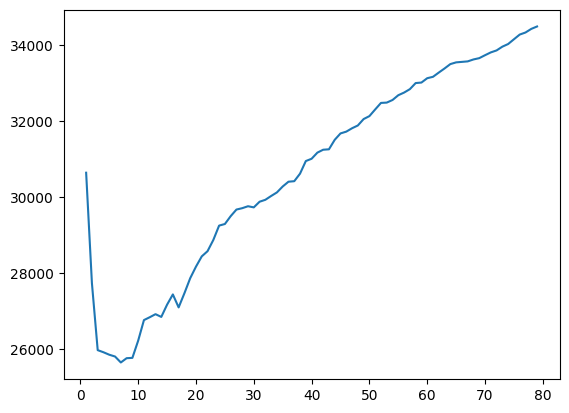

In [97]:
plt.plot(n_neighbors,mean_absolute_error_value),np.min(mean_absolute_error_value),np.argmin(mean_absolute_error_value)

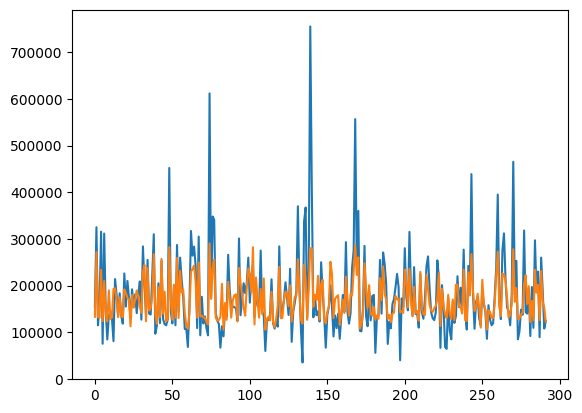

In [98]:
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_test)),y_pred)

In [99]:
# x_sample = np.array(Test_data.fillna(0))
x = X_train[0]
x = np.expand_dims(x, axis=0)
x.shape

(1, 79)

In [100]:
y_pred = knn_regressor.predict(x)
y_pred,y_test[0]

(array([156512.10126582]), 154500)